# Taller 1: Uso práctico de Numpy, Pandas y Matplotlib en Saber11

Juan David Cetina, Nicole Sofia Vangrieken, Felipe Martínez y Mariana Salas

In [6]:
# Importar las librerías para manejar y analizar datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ruta al archivo CSV
ruta_dataset = "C:\\Users\\marim\\Downloads\\Saber_11__2020-2_20250112.csv"

# Leer el archivo CSV y cargarlo en un DataFrame, indicando que los separadores son ";"
df = pd.read_csv(ruta_dataset, sep=";")

# Eliminar observaciones con NA
df_sin_na = df.dropna()

print("\nDataset después de eliminar observaciones con NA:")
print(f"Total de filas originales: {df.shape[0]}")
print(f"Total de filas después de eliminar NA: {df_sin_na.shape[0]}")

df = df_sin_na

# Cambiar nombre de variables
df.rename(columns={
    'ESTU_COD_RESIDE_MCPIO': 'MunicipioCodigo', 
    'ESTU_MCPIO_RESIDE': 'Municipio', 
    'PUNT_GLOBAL': 'PuntajeGlobal',
    'FAMI_ESTRATOVIVIENDA': 'Estrato',
    'COLE_JORNADA': 'Jornada'
}, inplace=True)


Dataset después de eliminar observaciones con NA:
Total de filas originales: 504872
Total de filas después de eliminar NA: 371826


## 1. Calcular las puntuaciones medias por municipio y crear un histograma. 📊


Promedio de puntajes globales por municipio:
MunicipioCodigo
5001.0     253.531780
5002.0     248.694268
5004.0     215.050000
5021.0     233.416667
5030.0     248.764398
              ...    
99001.0    235.345324
99524.0    238.282609
99624.0    233.692308
99773.0    219.208333
99999.0    246.000000
Name: PuntajeGlobal, Length: 1105, dtype: float64


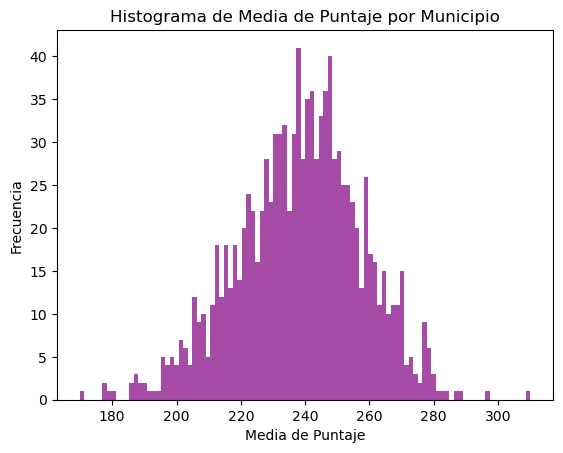

In [7]:
# Calcular el promedio de puntaje global por Municipio
promedios_por_municipio = df.groupby('MunicipioCodigo')['PuntajeGlobal'].mean()
print("\nPromedio de puntajes globales por municipio:")
print(promedios_por_municipio)

# Histograma
plt.hist(promedios_por_municipio, bins=100, color="purple", alpha=0.7)
plt.xlabel("Media de Puntaje")
plt.ylabel("Frecuencia")
plt.title("Histograma de Media de Puntaje por Municipio")
plt.show()

## 2. Analizar las puntuaciones por grupo étnico y nivel socioeconómico, representando los resultados con gráficos. 📈

In [25]:
# 

# 3. Responde a las siguientes preguntas con gráficos: ❓

### ¿Los estudiantes de estrato 6 siempre obtienen mejores resultados? 🤔

265.30621572212067
251.9918082015377


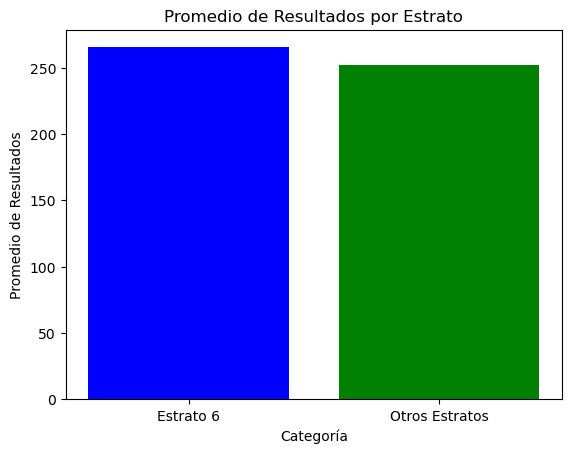

In [8]:
# Filtrar por estrato 6 y obtener los resultados
estrato_6 = df[df['Estrato'] == "Estrato 6"]

# Calcular el promedio de los resultados para estrato 6 y otros estratos
promedio_estrato_6 = estrato_6['PuntajeGlobal'].mean()
promedio_otros_estratos = df[df['Estrato'] != "Estrato 6"]['PuntajeGlobal'].mean()
print(promedio_estrato_6)
print(promedio_otros_estratos)

# Crear un gráfico de barras
labels = ['Estrato 6', 'Otros Estratos']
promedios = [promedio_estrato_6, promedio_otros_estratos]

plt.bar(labels, promedios, color=['blue', 'green'])
plt.xlabel('Categoría')
plt.ylabel('Promedio de Resultados')
plt.title('Promedio de Resultados por Estrato')
plt.show()

#### ¿Qué modalidades de secundaria tienen los mejores y peores promedios? 🏫

Promedio Completa : 280.16725686873093
Promedio Unica : 251.70127288749632
Promedio Mañana : 250.32654523616162
Promedio Tarde : 246.3031461893138
Promedio Sabatina : 212.9231299077008
Promedio Noche : 214.94499031275947


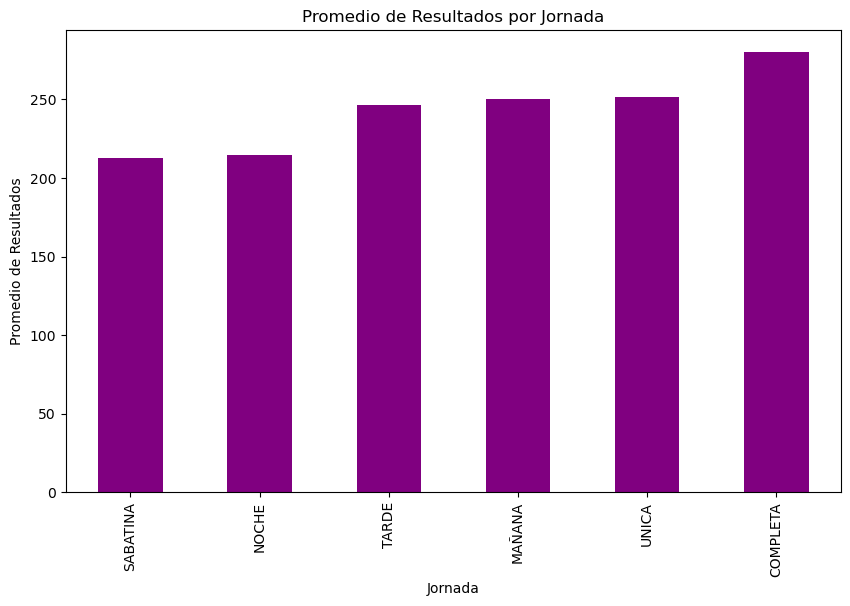

In [9]:
# Calcular los promedios por jornada
promedios_jornada = df.groupby('Jornada')['PuntajeGlobal'].mean().sort_values()
promedio_completa = df[df['Jornada'] == "COMPLETA"]['PuntajeGlobal'].mean()
print("Promedio Completa :",promedio_completa)
promedio_unica=df[df['Jornada'] == "UNICA"]['PuntajeGlobal'].mean()
print("Promedio Unica :",promedio_unica)
promedio_mañana=df[df['Jornada'] == "MAÑANA"]['PuntajeGlobal'].mean()
print("Promedio Mañana :",promedio_mañana)
promedio_tarde=df[df['Jornada'] == "TARDE"]['PuntajeGlobal'].mean()
print("Promedio Tarde :",promedio_tarde)
promedio_sabatina=df[df['Jornada'] == "SABATINA"]['PuntajeGlobal'].mean()
print("Promedio Sabatina :",promedio_sabatina)
promedio_noche=df[df['Jornada'] == "NOCHE"]['PuntajeGlobal'].mean()
print("Promedio Noche :",promedio_noche)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
promedios_jornada.plot(kind='bar', color='purple')
plt.xlabel('Jornada')
plt.ylabel('Puntaje Promedio')
plt.title('Promedio de Resultados por Jornada')
plt.show()